In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Holdings

In [2]:
import pyarrow.parquet as pq

# Specify the path to your parquet.gzip file
parquet_file_path = '../data/holdings_all_hf.parquet.gzip'

# Read the Parquet file using pyarrow
holdings = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame if needed
holdings = holdings.to_pandas()

holdings.head()

,date,mgrno,first_report,last_report,shares,permno,shares_adj,phrdate,pshares_adj,trade,...,askhi,bidlo,ret,shrout,yyyy-mm,gics,comnam,ticker,gics1,gics2
0,2018-12-31,127.0,False,False,290920.0,12373,290920.0,2018-09-30,220707.0,70213.0,...,97.620003,94.730003,0.019424,43030.0,2018-12,60102030.0,HOWARD HUGHES CORP,HHC,Real Estate,Equity Real Estate Investment Trusts (REITs)
1,2019-03-31,127.0,False,False,269088.0,12373,269088.0,2018-12-31,290920.0,-21832.0,...,NaN,NaN,NaN,NaN,None,0.0,None,None,Unknown,Unknown
2,2019-06-30,127.0,False,True,204225.0,12373,204225.0,2019-03-31,269088.0,-64863.0,...,NaN,NaN,NaN,NaN,None,0.0,None,None,Unknown,Unknown
3,2015-06-30,127.0,False,False,1792286.0,12756,1792286.0,2015-03-31,1771986.0,20300.0,...,29.980000,29.500000,0.005062,132182.0,2015-06,40402035.0,R L J LODGING TRUST,RLJ,Financials,Unknown
4,2015-09-30,127.0,False,False,1715829.0,12756,1715829.0,2015-06-30,1792286.0,-76457.0,...,25.350000,25.049999,0.008782,130769.0,2015-09,40402035.0,R L J LODGING TRUST,RLJ,Financials,Unknown


## number of institutions

In [3]:
institutions = holdings.groupby('year')['mgrno'].nunique()
institutions

year
2015    1804
2016    1892
2017    1998
2018    2222
2019    2447
2020    2646
2021    2928
2022    3168
Name: mgrno, dtype: int64

Text(0.5, 1.0, 'Number of Distinct Institutions')

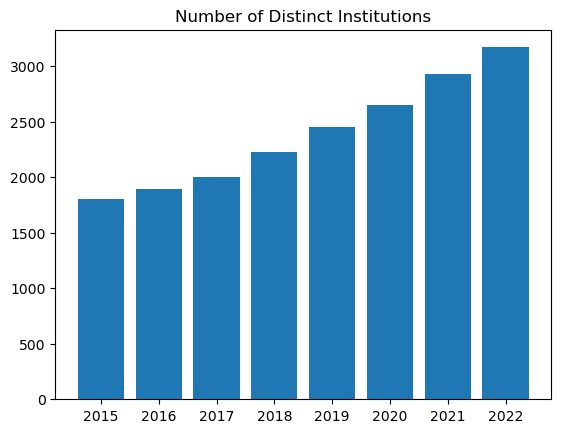

In [4]:
plt.bar(institutions.index, institutions)
plt.title('Number of Distinct Institutions')

## institution holding of shares

In [5]:
stks = holdings.groupby(['year', 'mgrno'])['permno'].nunique()
stks = stks.groupby('year').mean()

Text(0.5, 1.0, 'Average distinct stocks institutions hold')

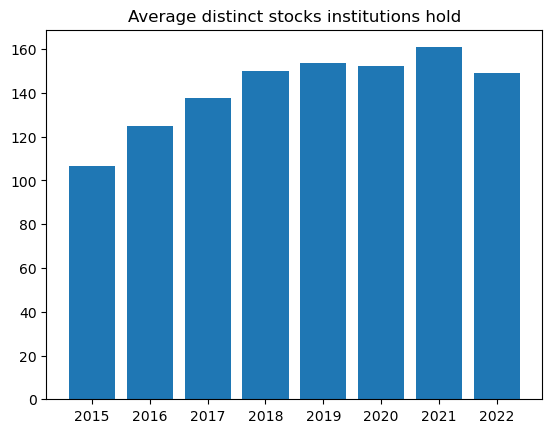

In [6]:
plt.bar(stks.index, stks)
plt.title('Average distinct stocks institutions hold')

In [7]:
recent_holdings = holdings[holdings['year']==2022]
recent_stks = recent_holdings.groupby(['mgrno'])['permno'].nunique()
recent_stks

mgrno
127.0        44
155.0        94
160.0        38
185.0       570
220.0      1073
           ... 
93330.0      58
93698.0     154
93950.0      59
94280.0       9
94500.0      86
Name: permno, Length: 3168, dtype: int64

Text(0.5, 1.0, 'Distinct Stock Holdings Distribution for Institutions in 2022')

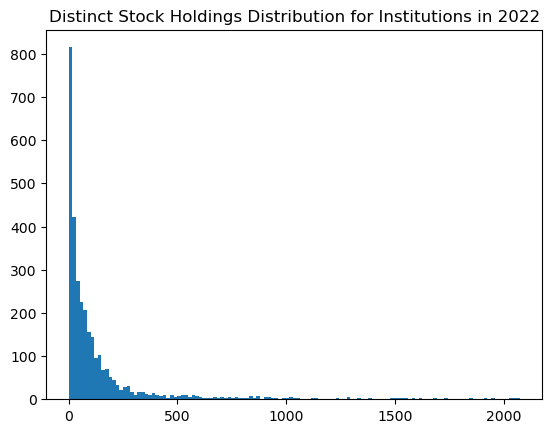

In [8]:
plt.hist(recent_stks, bins = 'auto')
plt.title('Distinct Stock Holdings Distribution for Institutions in 2022')

## number of instituions holding this stock

Text(0.5, 1.0, 'Average distinct institutions that hold a stock')

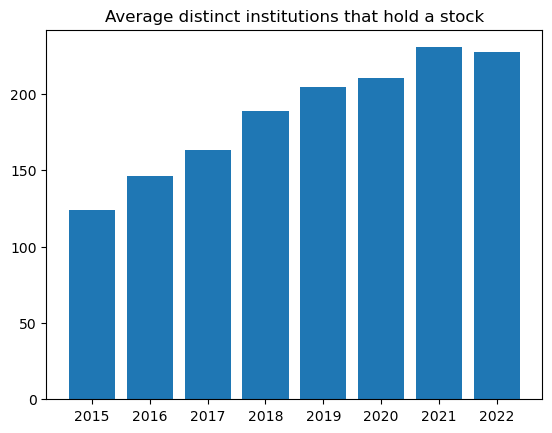

In [9]:
mgrno_holding_stocks = holdings.groupby(['year','permno'])['mgrno'].nunique()
mgrno_holding_stocks = mgrno_holding_stocks.groupby('year').mean()
plt.bar(mgrno_holding_stocks.index, mgrno_holding_stocks)
plt.title('Average distinct institutions that hold a stock')

In [10]:
stks = stks.groupby('year').mean()

# net flow

In [11]:
# Specify the path to your parquet.gzip file
parquet_file_path = '../data/hf_netflow.parquet.gzip'

# Read the Parquet file using pyarrow
net_flow = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame if needed
net_flow = net_flow.to_pandas()

net_flow.head()

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3
0,2015-03-31,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,4553.577546,-0.097883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-30,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,4102.561959,0.036171,4051.512488,0.000000,146.225932,0.036092,-5.295758,0.000000,0.001163,0.888580
2,2015-09-30,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,4064.568036,0.084079,136.028707,411.538853,-22.560811,-0.041202,-186.386535,0.033311,0.078589,0.088038
3,2015-12-31,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,4502.353836,0.060149,641.889624,270.084462,42.346158,0.046434,96.041597,0.063053,0.090077,0.200743
4,2016-03-31,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,4568.146306,0.046889,59.260200,189.999783,-4.934305,-0.019796,-205.019623,0.013067,0.058698,0.009826


## map institutions, get top 10 names

In [12]:
top10_recent_stks =  recent_stks[recent_stks.nlargest(10).index]

In [13]:
mgr_map = net_flow.drop_duplicates(subset='mgrno')
mgr_map = mgr_map[mgr_map['mgrno'].isin(top10_recent_stks.index)]
mgr_map

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3
15608,2015-03-31,10039.0,"GEODE CAPITAL MGMT, L.L.C.",False,False,161176.761506,0.003589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17323,2015-03-31,10404.0,"SG AMERICAS SECURITIES, LLC",False,False,14181.478928,0.003049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19099,2015-03-31,10736.0,"JANE STR HOLDING, LLC",False,False,5482.676828,0.004203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24979,2015-03-31,11800.0,CREDIT SUISSE SECS (USA) LLC,False,False,80502.587544,0.004688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27227,2015-03-31,12116.0,"SUSQUEHANNA INTL GROUP, LLP",False,False,39009.887168,0.010269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40218,2015-03-31,13542.0,TOWER RESEARCH CAPITAL LLC,False,False,777.119388,-0.002067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52534,2015-03-31,16210.0,CITADEL LLC,False,False,54321.429490,0.002268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52666,2015-03-31,18931.0,"APERIO GROUP, LLC",False,False,8270.143812,0.002991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69396,2015-03-31,57986.0,MILLENNIUM MANAGEMENT LLC,False,False,44451.071218,0.003435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70426,2015-03-31,67839.0,PARAMETRIC PORTFOLIO ASSOC LLC,False,False,43679.470450,0.002477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## held value

In [14]:
net_flow['year'] = net_flow['rdate'].dt.year
recent_net_flow = net_flow[net_flow['year']==2022]
recent_net_flow.head()

,rdate,mgrno,mgrname,first_report,last_report,assets,pret,tbuys,tsales,tgain,tgainret,netflows,turnover1,turnover2,turnover3,year
27,2022-03-31,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,3443.257038,-0.185645,190.557239,406.021426,9.808245,0.016441,-228.624265,0.052366,0.109316,0.095957,2022
28,2022-06-30,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,2660.282239,-0.093528,415.902652,606.302827,-0.103073,-0.000101,-143.752247,0.136282,0.162536,0.255123,2022
29,2022-09-30,127.0,"AEW CAPITAL MANAGEMENT, L.P.",False,False,2559.700737,0.032966,380.395906,126.565839,14.141146,0.027894,148.229898,0.048493,0.103296,0.134847,2022
58,2022-03-31,155.0,"PIER CAPITAL, LLC",False,False,783.477152,-0.236220,156.586003,133.628042,-28.907540,-0.099608,-11.826400,0.154328,0.153390,0.293575,2022
59,2022-06-30,155.0,"PIER CAPITAL, LLC",False,False,586.308938,0.008568,89.436340,92.280871,-10.839245,-0.059649,-12.095157,0.130584,0.129591,0.216499,2022


In [15]:
held_value = recent_net_flow.groupby('mgrno')['assets'].mean()
log_held_value = np.log(held_value)
log_held_value

mgrno
127.0       7.968232
155.0       6.477776
160.0       7.444930
185.0      10.146153
220.0       9.929404
             ...    
93330.0     9.884425
93698.0     6.714780
93950.0     9.175961
94280.0     4.510506
94500.0     8.053815
Name: assets, Length: 3308, dtype: float64

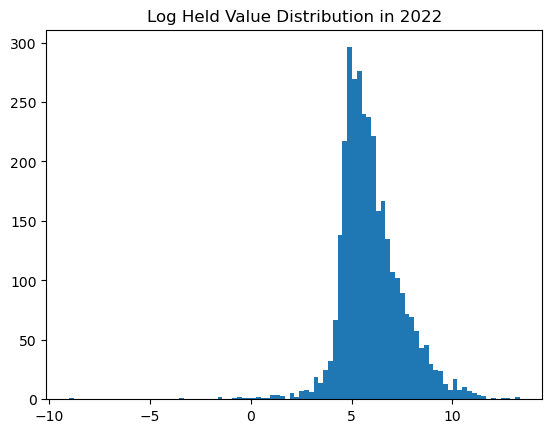

In [16]:
plt.hist(log_held_value, bins = 'auto')
plt.title('Log Held Value Distribution in 2022')
plt.show()

## netflows

In [17]:
net_flows = recent_net_flow.groupby('mgrno')['netflows'].mean()
pos_net_flows = net_flows[net_flows>0]
neg_net_flows = net_flows[net_flows<0]

In [18]:
log_pos_net_flows = np.log(pos_net_flows)
log_neg_net_flows = np.log(-neg_net_flows)

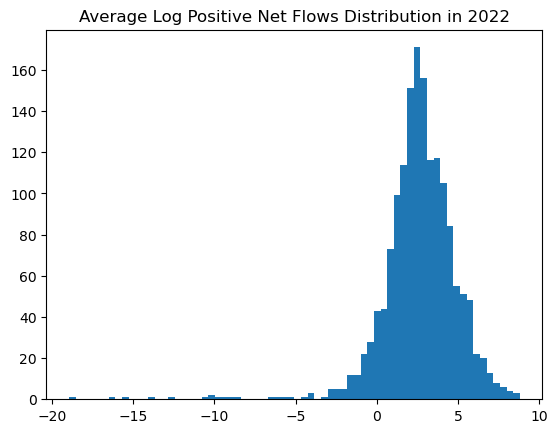

In [19]:
plt.hist(log_pos_net_flows, bins = 'auto')
plt.title('Average Log Positive Net Flows Distribution in 2022')
plt.show()

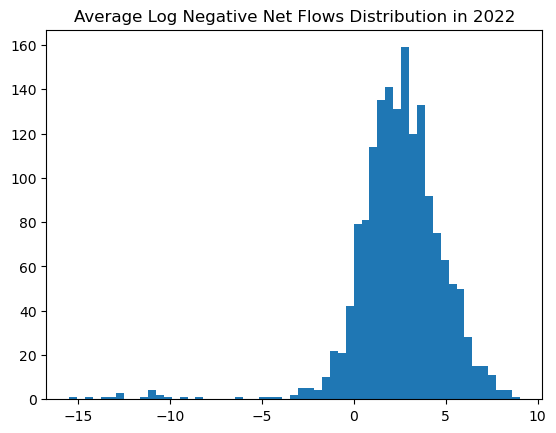

In [20]:
plt.hist(log_neg_net_flows, bins = 'auto')
plt.title('Average Log Negative Net Flows Distribution in 2022')
plt.show()

## tgainret

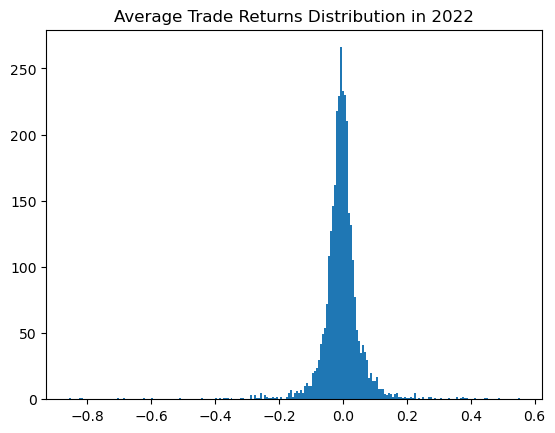

In [21]:
tgainret = recent_net_flow.groupby('mgrno')['tgainret'].mean()
plt.hist(tgainret, bins = 'auto')
plt.title('Average Trade Returns Distribution in 2022')
plt.show()

In [22]:
log_pos_tgainret = np.log(tgainret[tgainret>0])
log_neg_tgainret = np.log(-tgainret[tgainret<0])

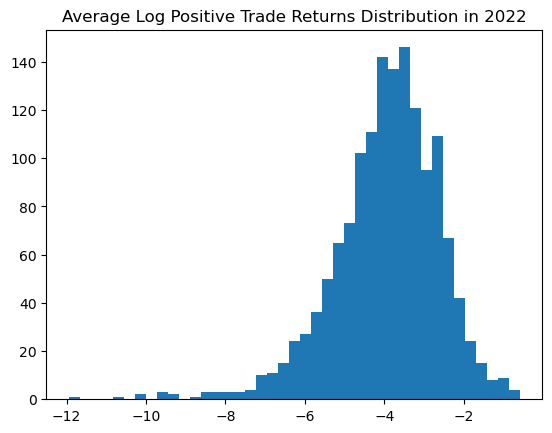

In [23]:
plt.hist(log_pos_tgainret, bins = 'auto')
plt.title('Average Log Positive Trade Returns Distribution in 2022')
plt.show()

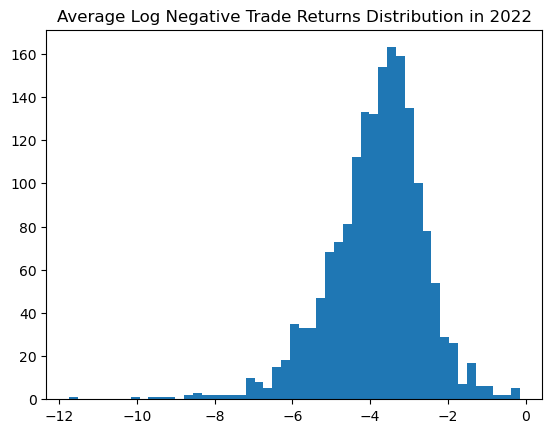

In [24]:
plt.hist(log_neg_tgainret, bins = 'auto')
plt.title('Average Log Negative Trade Returns Distribution in 2022')
plt.show()

## buy & sell

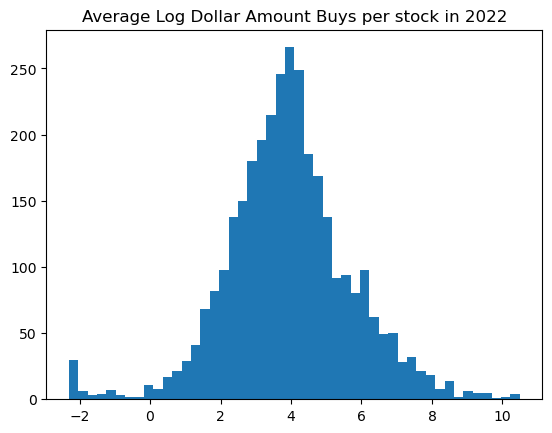

In [25]:
tbuys = np.log(0.1+recent_net_flow.groupby('mgrno')['tbuys'].mean())
plt.hist(tbuys, bins = 'auto')
plt.title('Average Log Dollar Amount Buys per stock in 2022')
plt.show()

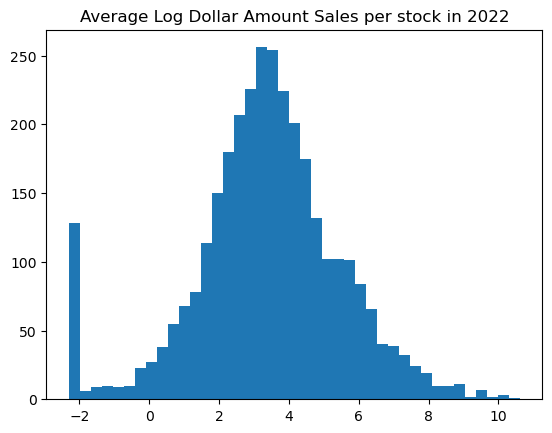

In [26]:
tsales = np.log(0.1+recent_net_flow.groupby('mgrno')['tsales'].mean())
plt.hist(tsales, bins = 'auto')
plt.title('Average Log Dollar Amount Sales per stock in 2022')
plt.show()